In [184]:
#============================================================
# فراخوانی کتابخانه های مورد نیاز
import pandas as pd
from pandas import  DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso,ElasticNet,LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV
import numpy as np
import plotly.express as px
import re
from itertools import chain
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')
#============================================================
#======columns meaining======
# name = نام
# year = سال
# seling_price = قیمت فروش
# km_driven = کیلومتر رانده شده
# fuel = سوخت
# seller_type =  نوع فروشنده
# transmission = انتقال
# owner = مالک
# mileage = مسافت پیموده شده
# engine = موتور
# max_power = حداکثر سرعت
# torque = گشتاور
# seats = صندلی ها
#============================================================

In [93]:
df = pd.read_csv('used_cars.csv')
# واکشی اطلاعات مهم دیتاست
df.head()
df.shape
df.columns
df.dtypes
df.duplicated().sum()
df[df.duplicated()]
df.nunique()
df.owner.nunique()
# df.info()
df.describe().T
df.isnull().sum()
df.corr(numeric_only=True)
df['owner'].value_counts().to_frame()
df['fuel'].value_counts().to_frame()
df['seller_type'].value_counts().to_frame()
df['transmission'].value_counts().to_frame()
df['seats'].value_counts().to_frame()
(df=='?').sum()
df[(df.year==2014) & (df.transmission=='Manual')] # نمایش خودرو های با سال ساخت ۲۰۱۴ و  دستی
df[(df.year==2014) & (df.transmission=='Automatic')] # نمایش خودرو های با سال ساخت ۲۰۱۴ و اتوماتیک
df[df.year==2014]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
10,Renault Duster 110PS Diesel RxL,2014,500000,68000,Diesel,Individual,Manual,Second Owner,19.01 kmpl,1461 CC,108.45 bhp,248Nm@ 2250rpm,5.0
47,Toyota Fortuner 4x4 MT,2014,1500000,77000,Diesel,Dealer,Manual,First Owner,12.55 kmpl,2982 CC,168.5 bhp,343Nm@ 1400-3400rpm,7.0
49,Mercedes-Benz B Class B180,2014,1450000,27800,Diesel,Dealer,Automatic,Second Owner,14.8 kmpl,2143 CC,120.7 bhp,200Nm@ 1250-4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8072,Nissan Terrano XL 85 PS,2014,450000,82000,Diesel,Individual,Manual,Second Owner,20.45 kmpl,1461 CC,83.8 bhp,200Nm@ 1900rpm,5.0
8073,Hyundai Grand i10 Magna,2014,400000,20000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
8075,Maruti Ciaz ZDi,2014,560000,90000,Diesel,Individual,Manual,Second Owner,26.21 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
8111,Toyota Etios Cross 1.4L GD,2014,425000,50000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.06 bhp,170Nm@ 1800-2400rpm,5.0


In [192]:
# ==================================================================================================
# تابع جایگزینی داده های پرت به میانگین ستون
def Replace_Outlier(data, column_name, min_value, max_value):
    df = pd.DataFrame(data)
    mean_value = df[column_name].mean()
    df.loc[(df[column_name] < min_value) | (df[column_name] > max_value), column_name] = mean_value
    return df
# ==================================================================================================
def labele_encoding(data,columns):
    df = pd.DataFrame(data)
    label_encoder=LabelEncoder()
    df[columns]=label_encoder.fit_transform(df[columns])
    return df
# ==================================================================================================
# درست کردن مقدار درون دیتاست
def fix_type_column(data,name_column,fillna=True,replace=False,replace_record="",regex_fix=False,regex_str=""):
    df = pd.DataFrame(data)
    if fillna == True:
        df[name_column] = df[name_column].fillna(0)
    if replace == True:
        df[name_column] = df[name_column].replace(replace_record,0)
    if regex_fix == True :
        df[name_column] = df[name_column].astype(str)
        column_list = df[name_column].tolist()
        numbers = list(map(lambda s: re.findall(regex_str, s)[0], column_list))
        list_1 = [float(item) for item in numbers]
        df[name_column] = list_1
        df[name_column] = df[name_column].replace(0,df[name_column].mean())
    return df
# ==================================================================================================
def show_outlier(data,name_columns):
    for name_column in name_columns:
        df = DataFrame(data)
        fig = px.box(df,y=name_column)
        fig.show()
# ==================================================================================================
# تابع حذف داده های پرت
def remove_outlier(df,name_column_list):
    for name_column in name_column_list:
        Q1 = np.quantile(df[name_column],0.25)
        Q3 = np.quantile(df[name_column],0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[name_column] >= lower_bound) & (df[name_column] <= upper_bound)]
    return df
# ==================================================================================================
def show_chart_barplot(data,x_,title,xlabel,ylabel,y_=None,style='whitegrid',color='viridis',width_=0.5,money_format=False):
    plt.figure(figsize=(15,5))
    if money_format == True:
        format_ = f"$ {p.get_height()}"
    sns.set_style(style)
    ax=sns.barplot(data=data,x=x_,y=y_,width=width_,palette=color,hue=x_, legend=False)
    for p in ax.patches:
        format_ = p.get_height()
        if money_format == True:
            format_ = f"$ {p.get_height()}"
            ax.annotate(format(format_), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 9), 
                        textcoords = 'offset points')
        else:
            ax.annotate(format(format_), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 9), 
                        textcoords = 'offset points')
    plt.title(title,fontsize=14)
    plt.xlabel(xlabel,fontsize=12)
    plt.ylabel(ylabel,fontsize=12)
    plt.xticks(range(len(data)), data[x_], rotation=45, ha='right')
    plt.show()
# ==================================================================================================
def show_chart_countplot(data,x_,title,xlabel,ylabel,y_=None,style='whitegrid',color_='viridis',width_=0.5):
    plt.figure(figsize=(10,5))
    sns.set_style(style)
    ax= sns.countplot(data=data,x=x_,y=y_,palette=color_,width=width_,hue=x_, legend=False)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
    plt.title(title,fontsize=14)
    plt.xlabel(xlabel,fontsize=12)
    plt.ylabel(ylabel,fontsize=12)
    plt.xticks(rotation=45,ha='right')
    plt.show()
# ==================================================================================================
def show_chart_lineplot(data,x_,title,xlabel,ylabel,y_=None,style='whitegrid',color_='green'):
    plt.figure(figsize=(10,5))
    sns.set_style(style)
    sns.lineplot(data=data,x=x_,y=y_,color=color_)
    plt.title(title,fontsize=14)
    plt.xlabel(xlabel,fontsize=12)
    plt.ylabel(ylabel,fontsize=12)
    plt.xticks(rotation=45,ha='right')
    plt.show()
# ==================================================================================================
def show_chart_histplot(data,x_,title,xlabel,ylabel,y_=None,style='whitegrid',color_='viridis',bins=30,kde=True,value_annotate=True):
    plt.figure(figsize=(10,5))
    sns.set_style(style)
    ax = sns.histplot(data=data,x=x_,y=y_,color=color_,bins=bins,kde=kde,legend=False)
    if value_annotate == True :
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.2f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 9), 
                        textcoords = 'offset points')
    plt.title(title,fontsize=14)
    plt.xlabel(xlabel,fontsize=12)
    plt.ylabel(ylabel,fontsize=12)
    plt.xticks(rotation=45,ha='right')
    plt.show()
# ==================================================================================================
def corr_chart(data,mask=False):
    plt.figure(figsize=(12,8))
    corr = df.corr(numeric_only=True)
    if mask == True :
        mask = np.triu(corr)
        sns.heatmap(corr,square=True,annot=True,mask=mask,cmap='crest',fmt=".2f")
        plt.show
    else :
        sns.heatmap(corr,square=True,annot=True,mask=mask,cmap='crest',fmt=".2f")
        plt.show()
# ==================================================================================================
def Show_Single_Linear_Regression(data:DataFrame,x,Y,Title_chart='Singe Linear Regression Model Score',X_Label="X-Label",Y_Label="Y-Label"):
    X = data[[x]]
    y = data[Y]
    # تقسیم داده ها به آموزش و آزمون
    X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    # ایجاد مدل
    Model =LinearRegression()
    # آموزش مدل
    Model.fit(X_train,y_train)
    # تخمین و پیش بینی داده های آموزش داده شده
    y_pred = Model.predict(X_test)
    # بررسی کیفیت مدلی که آموزش دیده شده است
    MSE = mean_squared_error(y_test,y_pred)
    R2 = r2_score(y_test,y_pred)
    print(f"Mean Squared Erorr : {MSE} ")
    print(f"R2 Score : % {(R2*100):.4f}")
    # رسم نمودار مدل
    plt.figure(figsize=(7,5))
    # نمایش نمودار حبابی داده های آموزشی
    plt.scatter(y_train,Model.predict(X_train),color="blue",alpha=0.5,label="Training Data")
    # اضافه کردن داده هایی پیش بینی شده روی نمودار
    plt.scatter(y_test,y_pred,color="green",alpha=0.5,label='Predicted Data')
    # اضافه کردن خط رگرسیون روی نمودار
    plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],'-',color="red",label="Regression Line")
    plt.title(Title_chart,fontsize=16)
    plt.xlabel(X_Label,fontsize=13)
    plt.ylabel(Y_Label,fontsize=13)
    plt.show()
# ==================================================================================================
def Show_Multiple_Linear_Regression(data:DataFrame,X,Y,Title_chart='Multiple Linear Regression Model Score',X_Label="X-Label",Y_Label="Y-Label"):
    #=====================================
    X = data[X]
    y = data[Y]
    # تقسیم داده ها به آموزش و آزمون
    X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    # ایجاد مدل
    Model =LinearRegression()
    # آموزش مدل
    Model.fit(X_train,y_train)
    # تخمین و پیش بینی داده های آموزش داده شده
    y_pred = Model.predict(X_test)
    # بررسی کیفیت مدلی که آموزش دیده شده است
    MSE = mean_squared_error(y_test,y_pred)
    R2 = r2_score(y_test,y_pred)
    print(f"Mean Squared Erorr : {MSE} ")
    print(f"R2 Score : % {(R2*100):.4f}")
    # رسم نمودار مدل
    plt.figure(figsize=(7,5))
    # نمایش نمودار حبابی داده های آموزشی
    plt.scatter(y_train,Model.predict(X_train),color="blue",alpha=0.5,label="Training Data")
    # اضافه کردن داده هایی پیش بینی شده روی نمودار
    plt.scatter(y_test,y_pred,color="green",alpha=0.5,label='Predicted Data')
    # اضافه کردن خط رگرسیون روی نمودار
    plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],'-',color="red",label="Regression Line")
    plt.title(Title_chart,fontsize=16)
    plt.xlabel(X_Label,fontsize=13)
    plt.ylabel(Y_Label,fontsize=13)
    plt.show()
# ==================================================================================================
def Show_Multiple_Linear_Regression_3D(data:DataFrame, X, Y, Title_chart='Multiple Linear Regression Model Score 3D', X_Label="X-Label", Y_Label="Y-Label"):
    X = data[X]
    y = data[Y]
    # تقسیم داده‌ها به آموزش و آزمون
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # ایجاد مدل
    Model = LinearRegression()
    # آموزش مدل
    Model.fit(X_train, y_train)
    # تخمین و پیش‌بینی داده‌های آموزش داده شده
    y_pred = Model.predict(X_test)
    # بررسی کیفیت مدلی که آموزش دیده شده است
    MSE = mean_squared_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {MSE}")
    print(f"R2 Score: % {(R2*100):.4f}")
    # رسم نمودار مدل
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # نمایش داده‌های آموزشی
    ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], y_train, color='blue', label='Training Data')
    # نمایش داده‌های پیش‌بینی شده
    ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], y_pred, color='green', label='Predicted Data')
    # اضافه کردن خط رگرسیون
    x_surf = np.linspace(X_test.iloc[:, 0].min(), X_test.iloc[:, 0].max(), 100)
    y_surf = np.linspace(X_test.iloc[:, 1].min(), X_test.iloc[:, 1].max(), 100)
    x_surf, y_surf = np.meshgrid(x_surf, y_surf)
    z_surf = Model.intercept_ + Model.coef_[0]*x_surf + Model.coef_[1]*y_surf
    ax.plot_surface(x_surf, y_surf, z_surf, alpha=0.5, color='red', label='Regression Plane')
    ax.set_xlabel(X_Label)
    ax.set_ylabel(Y_Label)
    ax.set_zlabel('Predicted ' + Y_Label)
    plt.title(Title_chart, fontsize=16)
    plt.legend()
    plt.show()
# ==================================================================================================
def Show_Polynomial_Linear_Regression(data:DataFrame,X,Y,Title_chart='Polynomail Linear Regression Model Score',X_Label="X-Label",Y_Label="Y-Label"):
    #=====================================
    X = data[X]
    y = data[Y]
    # تقسیم داده ها به آموزش و آزمون
    X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    # ایجاد مدل
    Model_Poly =LinearRegression()
    pf = PolynomialFeatures(degree=2)
    # تبدیل و آموزش مدل
    X_train_Poly = pf.fit_transform(X_train)
    X_test_Poly = pf.fit_transform(X_test)
    Model_Poly.fit(X_train_Poly,y_train)
    # تخمین و پیش بینی داده های آموزش داده شده
    y_pred = Model_Poly.predict(X_test_Poly)
    # بررسی کیفیت مدلی که آموزش دیده شده است
    MSE = mean_squared_error(y_test,y_pred)
    R2 = r2_score(y_test,y_pred)
    print(f"Mean Squared Erorr : {MSE} ")
    print(f"R2 Score : % {(R2*100):.4f}")
    # رسم نمودار مدل
    plt.figure(figsize=(7,5))
    # نمایش نمودار حبابی داده های آموزشی
    plt.scatter(y_train,Model_Poly.predict(X_train_Poly),color="blue",alpha=0.5,label="Training Data")
    # اضافه کردن داده هایی پیش بینی شده روی نمودار
    plt.scatter(y_test,y_pred,color="green",alpha=0.5,label='Predicted Data')
    # اضافه کردن خط رگرسیون روی نمودار
    plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],'-',color="red",label="Regression Line")
    plt.title(Title_chart,fontsize=16)
    plt.xlabel(X_Label,fontsize=13)
    plt.ylabel(Y_Label,fontsize=13)
    plt.show()
# ==================================================================================================
def Show_Ridge_Linear_Regression(data:DataFrame,X,Y,Title_chart='Ridge Linear Regression Model Score',X_Label="X-Label",Y_Label="Y-Label"):
    #=====================================
    X = data[X]
    y = data[Y]
    # تقسیم داده ها به آموزش و آزمون
    X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    # ایجاد مدل
    Model_Ridge =Ridge()
    # آموزش مدل
    Model_Ridge.fit(X_train,y_train)
    # تخمین و پیش بینی داده های آموزش داده شده
    y_pred = Model_Ridge.predict(X_test)
    # پیدا کردن بهترین هایپر پارامتر ریدج
    params = {'alpha':[1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
    Bayesian_search = BayesSearchCV(
                estimator=Model_Ridge,
                search_spaces=params,
                scoring='r2',
                cv=5,
                n_iter=5 )
    Bayesian_search.fit(X_train,y_train)
    MSE = mean_squared_error(y_test,y_pred)
    # بررسی کیفیت مدلی که آموزش دیده شده است
    print(f"Mean Squared Erorr : {MSE} ")
    print(f"Best Parameeters : {Bayesian_search.best_params_} ")
    print(f"Best R2 Score : % {(Bayesian_search.best_score_*100):.4f}")
    # رسم نمودار مدل
    plt.figure(figsize=(7,5))
    # نمایش نمودار حبابی داده های آموزشی
    plt.scatter(y_train,Model_Ridge.predict(X_train),color="blue",alpha=Bayesian_search.best_params_['alpha'],label="Training Data")
    # اضافه کردن داده هایی پیش بینی شده روی نمودار
    plt.scatter(y_test,y_pred,color="green",alpha=Bayesian_search.best_params_['alpha'],label='Predicted Data')
    # اضافه کردن خط رگرسیون روی نمودار
    plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],'-',color="red",label="Regression Line")
    plt.title(Title_chart,fontsize=16)
    plt.xlabel(X_Label,fontsize=13)
    plt.ylabel(Y_Label,fontsize=13)
    plt.show()
# ==================================================================================================
def Show_Lasso_Linear_Regression(data:DataFrame,X,Y,Title_chart='Lasso Linear Regression Model Score',X_Label="X-Label",Y_Label="Y-Label"):
    #=====================================
    X = data[X]
    y = data[Y]
    # تقسیم داده ها به آموزش و آزمون
    X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    # ایجاد مدل
    Model_Lasso =Lasso()
    # آموزش مدل
    Model_Lasso.fit(X_train,y_train)
    # تخمین و پیش بینی داده های آموزش داده شده
    y_pred = Model_Lasso.predict(X_test)
    # پیدا کردن بهترین هایپر پارامتر ریدج
    params = {'alpha':[1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
    Bayesian_search = BayesSearchCV(
                estimator=Model_Lasso,
                search_spaces=params,
                scoring='r2',
                cv=5,
                n_iter=3)
    Bayesian_search.fit(X_train,y_train)
    MSE = mean_squared_error(y_pred,y_test)
    # بررسی کیفیت مدلی که آموزش دیده شده است
    print(f"Mean Squared Erorr : {MSE} ")
    print(f"Best Parameeters : {Bayesian_search.best_params_} ")
    print(f"Best R2 Score : % {(Bayesian_search.best_score_*100):.4f}")
    # رسم نمودار مدل
    plt.figure(figsize=(7,5))
    # نمایش نمودار حبابی داده های آموزشی
    plt.scatter(y_train,Model_Lasso.predict(X_train),color="blue",alpha=Bayesian_search.best_params_['alpha'],label="Training Data")
    # اضافه کردن داده هایی پیش بینی شده روی نمودار
    plt.scatter(y_test,y_pred,color="green",alpha=Bayesian_search.best_params_['alpha'],label='Predicted Data')
    # اضافه کردن خط رگرسیون روی نمودار
    plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],'-',color="red",label="Regression Line")
    plt.title(Title_chart,fontsize=16)
    plt.xlabel(X_Label,fontsize=13)
    plt.ylabel(Y_Label,fontsize=13)
    plt.show()
# ==================================================================================================
def Show_ElasticNet_Linear_Regression(data:DataFrame, X, Y, Title_chart='ElasticNet Linear Regression Model Score', X_Label="X-Label", Y_Label="Y-Label"):
    X = data[X]
    y = data[Y]
    # تقسیم داده‌ها به آموزش و آزمون
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # ایجاد مدل
    Model_ElasticNet = ElasticNet()
    # آموزش مدل
    Model_ElasticNet.fit(X_train, y_train)
    # تخمین و پیش‌بینی داده‌های آموزش داده شده
    y_pred = Model_ElasticNet.predict(X_test)
    # پیدا کردن بهترین هایپر پارامترها برای الستیک نت
    params = {'alpha': [1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
              'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}
    Bayesian_search = BayesSearchCV(
                estimator=Model_ElasticNet,
                search_spaces=params,
                scoring='r2',
                cv=5,
                n_iter=3)
    Bayesian_search.fit(X_train, y_train)
    MSE = mean_squared_error(y_pred, y_test)
    # بررسی کیفیت مدلی که آموزش دیده شده است
    print(f"Mean Squared Error: {MSE}")
    print(f"Best Parameters: {Bayesian_search.best_params_}")
    print(f"Best R2 Score: % {(Bayesian_search.best_score_*100):.4f}")
    # رسم نمودار مدل
    plt.figure(figsize=(7, 5))
    # نمایش نمودار حبابی داده‌های آموزشی
    plt.scatter(y_train, Model_ElasticNet.predict(X_train), color="blue", alpha=Bayesian_search.best_params_['alpha'], label="Training Data")
    # اضافه کردن داده‌های پیش‌بینی شده روی نمودار
    plt.scatter(y_test, y_pred, color="green", alpha=Bayesian_search.best_params_['alpha'], label='Predicted Data')
    # اضافه کردن خط رگرسیون روی نمودار
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '-', color="red", label="Regression Line")
    plt.title(Title_chart, fontsize=16)
    plt.xlabel(X_Label, fontsize=13)
    plt.ylabel(Y_Label, fontsize=13)
    plt.show()

In [95]:
# =============================================================================
# درست کردن نوع داده ای ستون ها
df = fix_type_column(df,'max_power',True,True,' bhp',True,r'\d+\.\d+|\d+')
df = fix_type_column(df,'torque',True,True,regex_fix=True,regex_str=r'(^\d+\.\d+|\d+)')
df = fix_type_column(df,'mileage',True,True,regex_fix=True,regex_str=r'(^\d+\.\d+|\d+)')
df = fix_type_column(df,'engine',True,True,regex_fix=True,regex_str=r'(^\d+\.\d+|\d+)')
df 
# =============================================================================

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,12.7,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,11.5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,24.0,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,190.0,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,140.0,5.0


In [96]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,8128.0,2013.804011,4.044249,1983.0,2011.0,2015.0,2017.0000,2020.0
selling_price,8128.0,638271.807702,806253.403508,29999.0,254999.0,450000.0,675000.0000,10000000.0
km_driven,8128.0,69819.510827,56550.554958,1.0,35000.0,60000.0,98000.0000,2360457.0
mileage,8128.0,19.443938,3.882534,9.0,16.8,19.1,22.2775,42.0
engine,8128.0,1457.546663,497.059362,624.0,1197.0,1248.0,1582.0000,3604.0
max_power,8128.0,91.519049,35.257952,32.8,69.0,83.1,101.2500,400.0
torque,8128.0,168.168594,95.977982,4.8,104.0,160.0,200.0000,789.0
seats,7907.0,5.416719,0.959588,2.0,5.0,5.0,5.0000,14.0


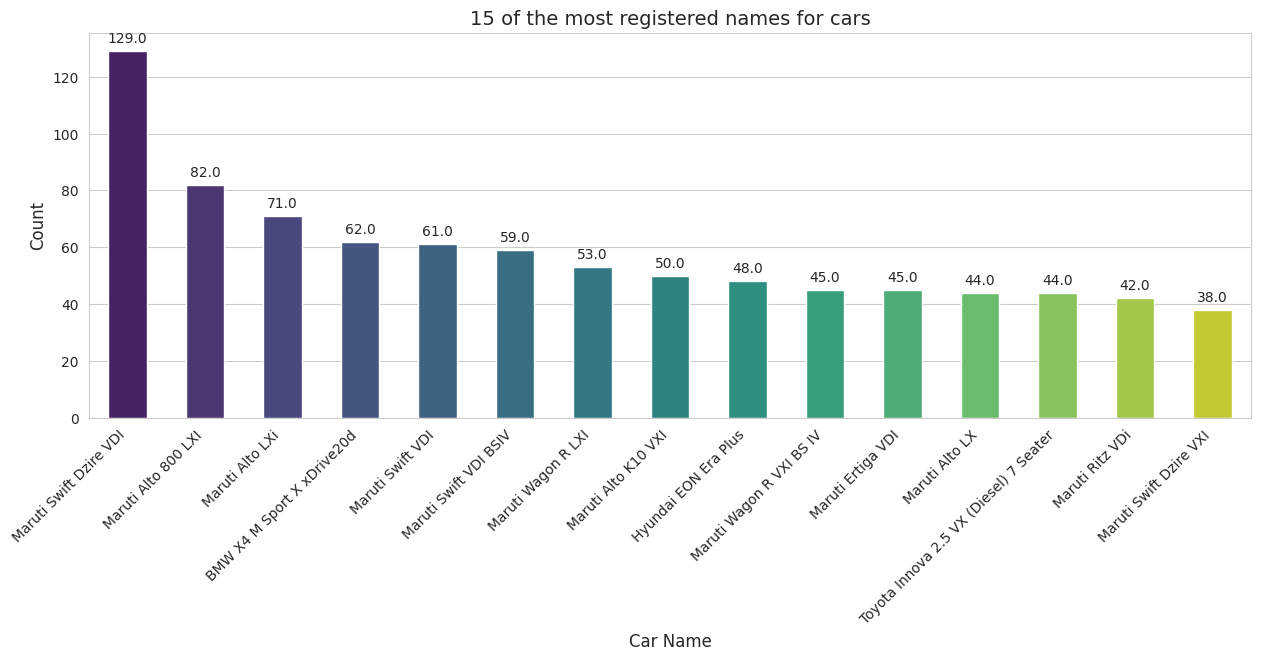

In [97]:
# شناسایی و نمایش ۱۵ خودرویی که از همه بیشتر ثبت شده است
#============================================================
top_cars = df.groupby('name').size().sort_values(ascending=False).reset_index().head(15)
top_cars = DataFrame(top_cars)
top_cars.rename(columns={0:'count'},inplace=True)
#============================================================
show_chart_barplot(data=top_cars,x_='name',y_='count',xlabel='Car Name',ylabel='Count',title="15 of the most registered names for cars")
#============================================================

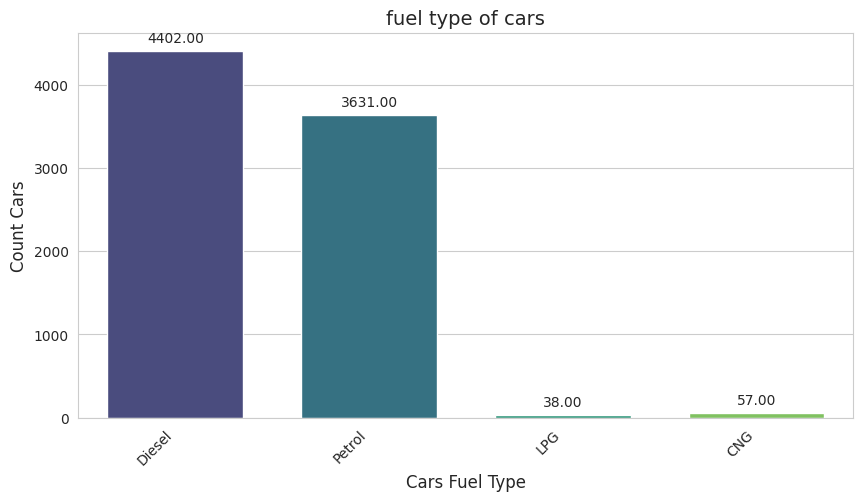

In [98]:
# نمایش نوع سوخت خودرو ها 
show_chart_countplot(data=df,x_='fuel',title="fuel type of cars",xlabel="Cars Fuel Type",ylabel="Count Cars",width_=0.7)

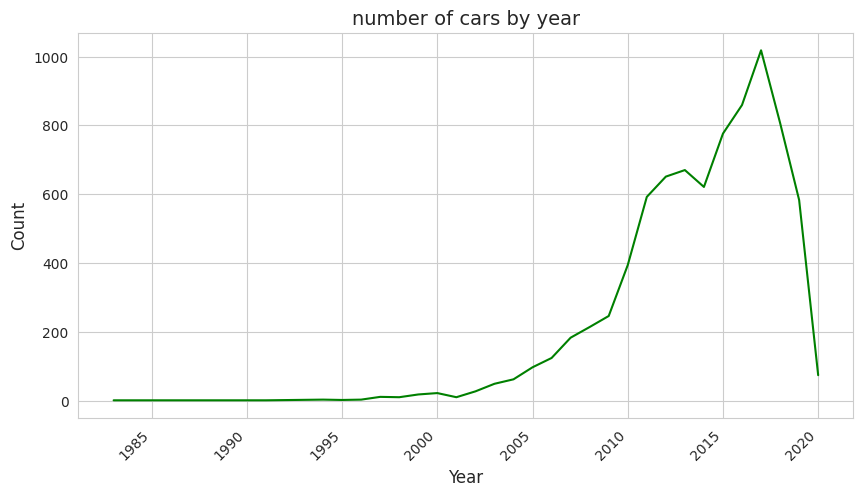

In [99]:
# نمایش تعداد ماشین ها بر حسب سال
# ======================================================================
year_cars = df.groupby('year')['name'].count().to_frame().reset_index()
year_cars.tail()
# ======================================================================
show_chart_lineplot(year_cars,x_='year',y_='name',title="number of cars by year",xlabel="Year",ylabel="Count")
# ======================================================================

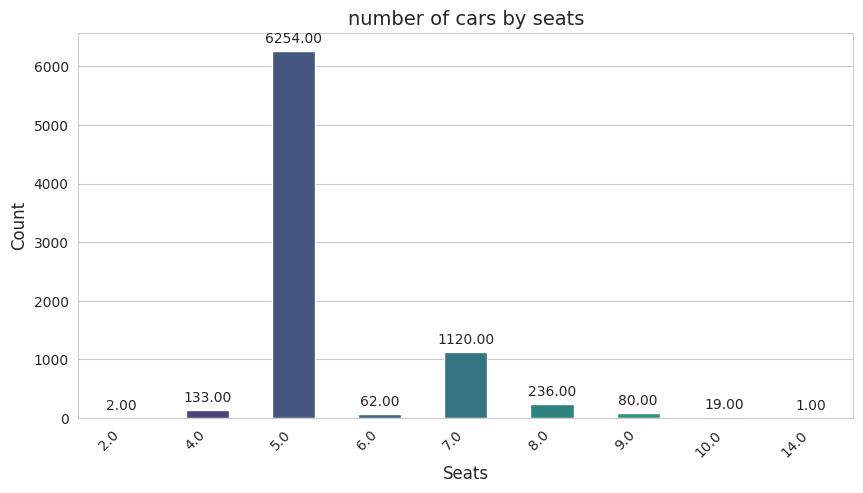

In [100]:
# نمایش تعداد خودرو بر حسب صندلی
show_chart_countplot(df,'seats',title='number of cars by seats',xlabel="Seats",ylabel="Count")

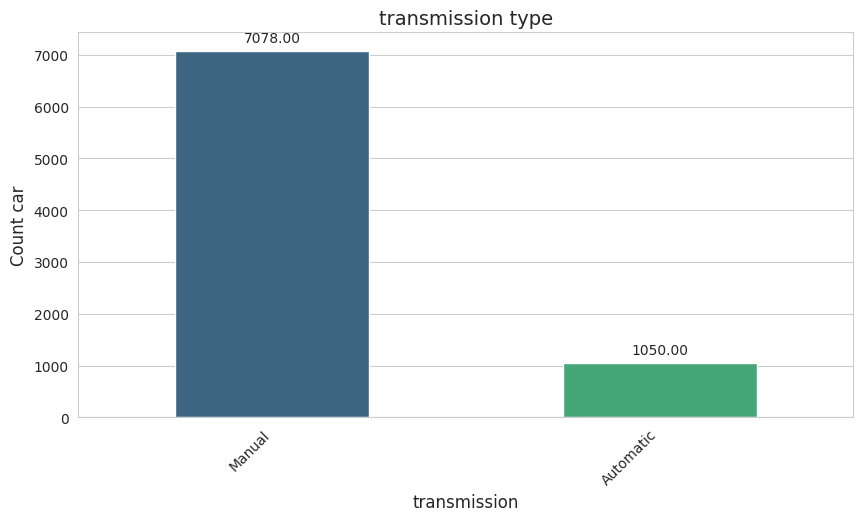

In [101]:
# نمایش تعداد ماشین های اتوماتیک و دستی
show_chart_countplot(df,x_="transmission",title='transmission type',xlabel="transmission",ylabel='Count car')

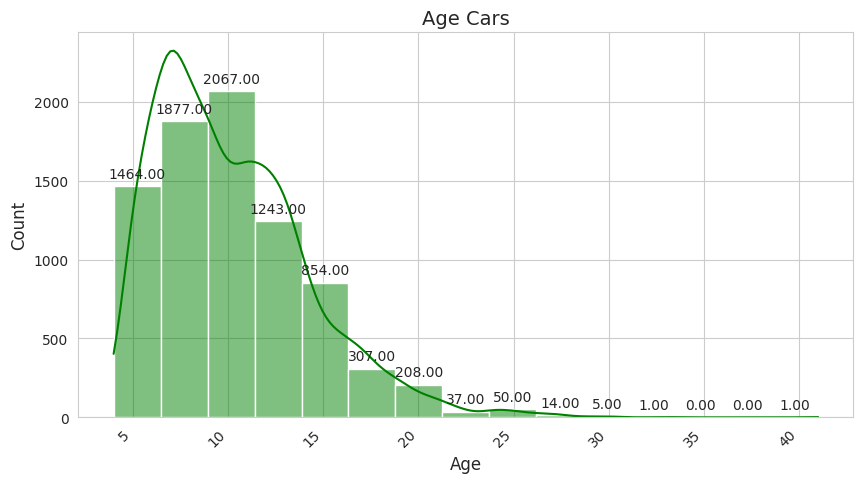

In [102]:
# واکشی سن ماشین ها و رسم هیستوگرام آن
df["Age"] = datetime.today().year - df["year"]
show_chart_histplot(data=df,x_='Age',title="Age Cars",xlabel="Age",ylabel="Count",bins=15,color_="green")

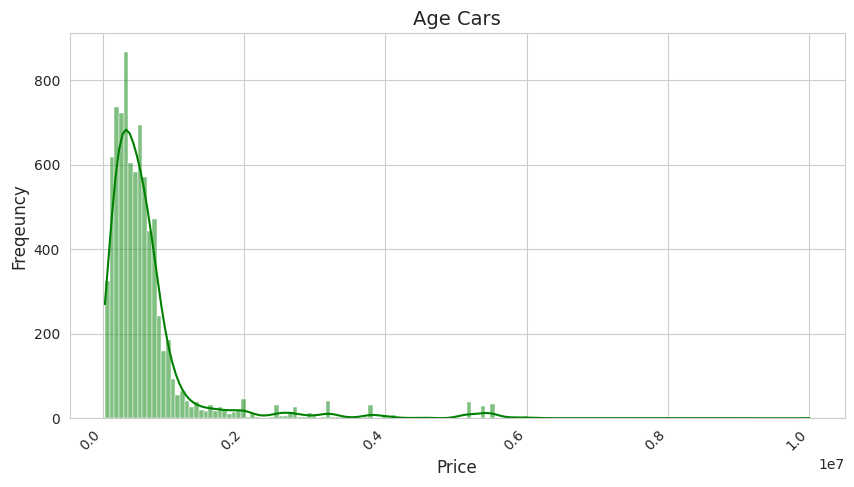

In [103]:
# رسم هیستوگرام قیمت فروش ماشین ها
show_chart_histplot(data=df,x_='selling_price',title="Age Cars",xlabel="Price",ylabel="Freqeuncy",bins=150,color_="green",value_annotate=False)

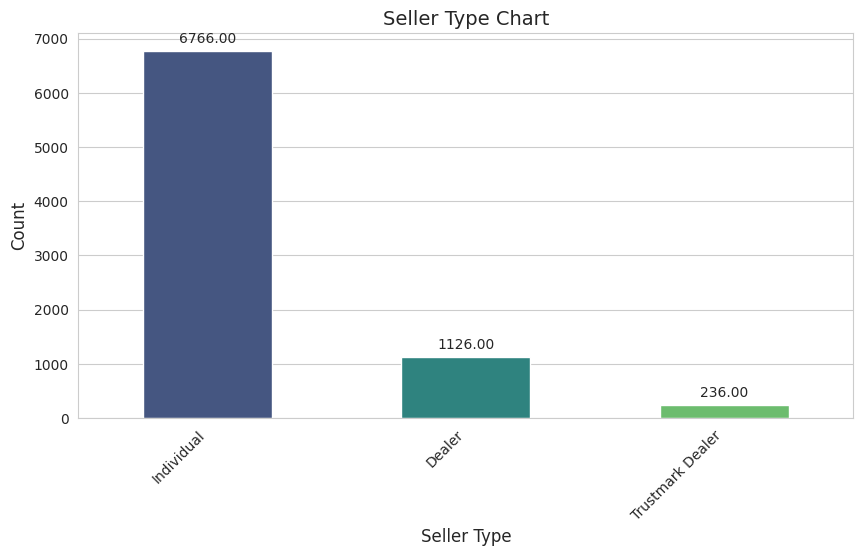

In [104]:
# نمایش نمودار نوع فروش
show_chart_countplot(df,'seller_type',"Seller Type Chart","Seller Type",'Count')

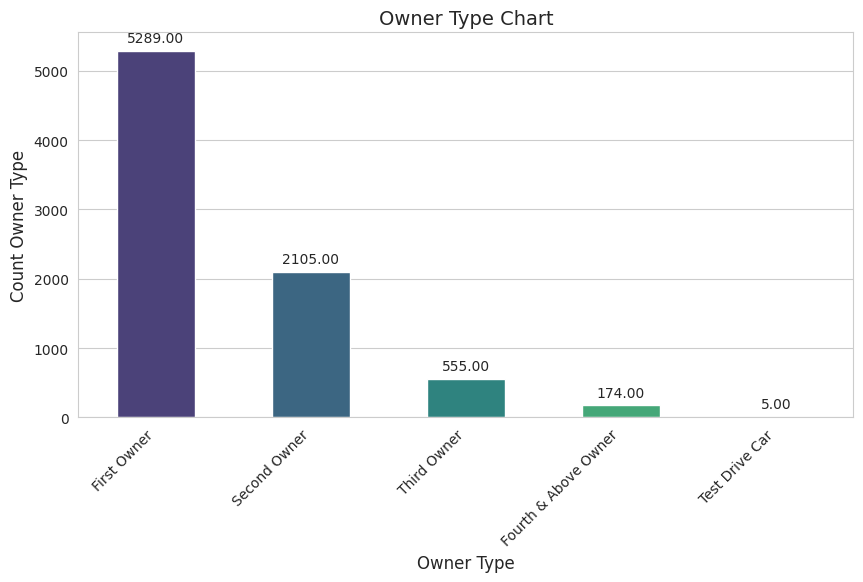

In [105]:
# نمایش نمودار نوع فروشنده
show_chart_countplot(df,"owner","Owner Type Chart","Owner Type","Count Owner Type")

In [106]:
# درست کردن ویژگی نسبت حداکثر قدرت به سن
df["Max_Power_To_Age"] = (df['max_power'] / df['Age']).round(4)
# درست کردن ویژگی نسبت قیمت به سن
df['Price_To_Age'] = df['selling_price'] / df['Age']
# درست کردن ویژگی نسبت قیمت به گشتاور
df['Price_To_Torque'] = df['selling_price'] / df['torque']
# درست کردن ویژگی نسبت قیمت به حداکثر قدرت
df["Price_To_Max_Power"] = df['selling_price'] / df['max_power']
# درست کردن ویژگی نسبت قیمت به موتور
df['Price_To_engine'] = df['selling_price'] / df['engine']

In [107]:
# حذف ستون های بدون کاربرد و کم اثر در روند ساخت مدل پیش بینی قیمت
df = df.drop('name',axis=1)
df = df.drop('owner',axis=1)
df = df.drop('transmission',axis=1)
df = df.drop('seller_type',axis=1)
df = df.drop('fuel',axis=1)
df = df.drop('seats',axis=1)
df = df.drop('Age',axis=1)
df = df.drop('km_driven',axis=1)

In [91]:
# Label Encoding
# df = labele_encoding(df,'owner')
# df = labele_encoding(df,'transmission')
# df = labele_encoding(df,'seller_type')
# df = labele_encoding(df,'fuel')


In [108]:
display(df)
df.dtypes

,year,selling_price,mileage,engine,max_power,torque,Max_Power_To_Age,Price_To_Age,Price_To_Torque,Price_To_Max_Power,Price_To_engine
0,2014,450000,23.40,1248.0,74.00,190.0,7.4000,45000.000000,2368.421053,6081.081081,360.576923
1,2014,370000,21.14,1498.0,103.52,250.0,10.3520,37000.000000,1480.000000,3574.188563,246.995995
2,2006,158000,17.70,1497.0,78.00,12.7,4.3333,8777.777778,12440.944882,2025.641026,105.544422
3,2010,225000,23.00,1396.0,90.00,22.4,6.4286,16071.428571,10044.642857,2500.000000,161.174785
4,2007,130000,16.10,1298.0,88.20,11.5,5.1882,7647.058824,11304.347826,1473.922902,100.154083
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,18.50,1197.0,82.85,113.7,7.5318,29090.909091,2814.423923,3862.401931,267.335004
8124,2007,135000,16.80,1493.0,110.00,24.0,6.4706,7941.176471,5625.000000,1227.272727,90.421969
8125,2009,382000,19.30,1248.0,73.90,190.0,4.9267,25466.666667,2010.526316,5169.147497,306.089744
8126,2013,290000,23.57,1396.0,70.00,140.0,6.3636,26363.636364,2071.428571,4142.857143,207.736390


year                    int64
selling_price           int64
mileage               float64
engine                float64
max_power             float64
torque                float64
Max_Power_To_Age      float64
Price_To_Age          float64
Price_To_Torque       float64
Price_To_Max_Power    float64
Price_To_engine       float64
dtype: object

In [109]:
# نمایش پراکندگی داده ها در ستون ها
list_columns_df = ["selling_price","mileage","engine",'max_power',"torque",'Max_Power_To_Age','Price_To_Age','Price_To_Torque','Price_To_Max_Power','Price_To_engine','year']
show_outlier(df,list_columns_df)

In [110]:
# پاکسازی داده های پرت ستون ها
list_columns_df = ["selling_price","mileage","engine",'max_power',"torque",'Max_Power_To_Age','Price_To_Age','Price_To_Torque','Price_To_Max_Power','Price_To_engine','year']
df = remove_outlier(df,list_columns_df)

In [111]:
# درست کردن ایندکس داده ها 
df.reset_index(drop=True,inplace=True)
df

,year,selling_price,mileage,engine,max_power,torque,Max_Power_To_Age,Price_To_Age,Price_To_Torque,Price_To_Max_Power,Price_To_engine
0,2014,450000,23.40,1248.0,74.00,190.00,7.4000,45000.000000,2368.421053,6081.081081,360.576923
1,2014,370000,21.14,1498.0,103.52,250.00,10.3520,37000.000000,1480.000000,3574.188563,246.995995
2,2017,440000,20.14,1197.0,81.86,113.75,11.6943,62857.142857,3868.131868,5375.030540,367.585631
3,2011,350000,23.59,1364.0,67.10,170.00,5.1615,26923.076923,2058.823529,5216.095380,256.598240
4,2013,200000,20.00,1399.0,68.10,160.00,6.1909,18181.818182,1250.000000,2936.857562,142.959257
...,...,...,...,...,...,...,...,...,...,...,...
5550,2013,320000,18.50,1197.0,82.85,113.70,7.5318,29090.909091,2814.423923,3862.401931,267.335004
5551,2007,135000,16.80,1493.0,110.00,24.00,6.4706,7941.176471,5625.000000,1227.272727,90.421969
5552,2009,382000,19.30,1248.0,73.90,190.00,4.9267,25466.666667,2010.526316,5169.147497,306.089744
5553,2013,290000,23.57,1396.0,70.00,140.00,6.3636,26363.636364,2071.428571,4142.857143,207.736390


In [112]:
# مرحله ذخیره داده ها پیش پردازش شده درون فایل جداگانه
df.to_csv("new_data.csv")

In [113]:
# باز کردن داده های جدید از روی فایل جدید
new_df = pd.read_csv('new_data.csv')
new_df = new_df.drop('Unnamed: 0',axis=1)
new_df

,year,selling_price,mileage,engine,max_power,torque,Max_Power_To_Age,Price_To_Age,Price_To_Torque,Price_To_Max_Power,Price_To_engine
0,2014,450000,23.40,1248.0,74.00,190.00,7.4000,45000.000000,2368.421053,6081.081081,360.576923
1,2014,370000,21.14,1498.0,103.52,250.00,10.3520,37000.000000,1480.000000,3574.188563,246.995995
2,2017,440000,20.14,1197.0,81.86,113.75,11.6943,62857.142857,3868.131868,5375.030540,367.585631
3,2011,350000,23.59,1364.0,67.10,170.00,5.1615,26923.076923,2058.823529,5216.095380,256.598240
4,2013,200000,20.00,1399.0,68.10,160.00,6.1909,18181.818182,1250.000000,2936.857562,142.959257
...,...,...,...,...,...,...,...,...,...,...,...
5550,2013,320000,18.50,1197.0,82.85,113.70,7.5318,29090.909091,2814.423923,3862.401931,267.335004
5551,2007,135000,16.80,1493.0,110.00,24.00,6.4706,7941.176471,5625.000000,1227.272727,90.421969
5552,2009,382000,19.30,1248.0,73.90,190.00,4.9267,25466.666667,2010.526316,5169.147497,306.089744
5553,2013,290000,23.57,1396.0,70.00,140.00,6.3636,26363.636364,2071.428571,4142.857143,207.736390


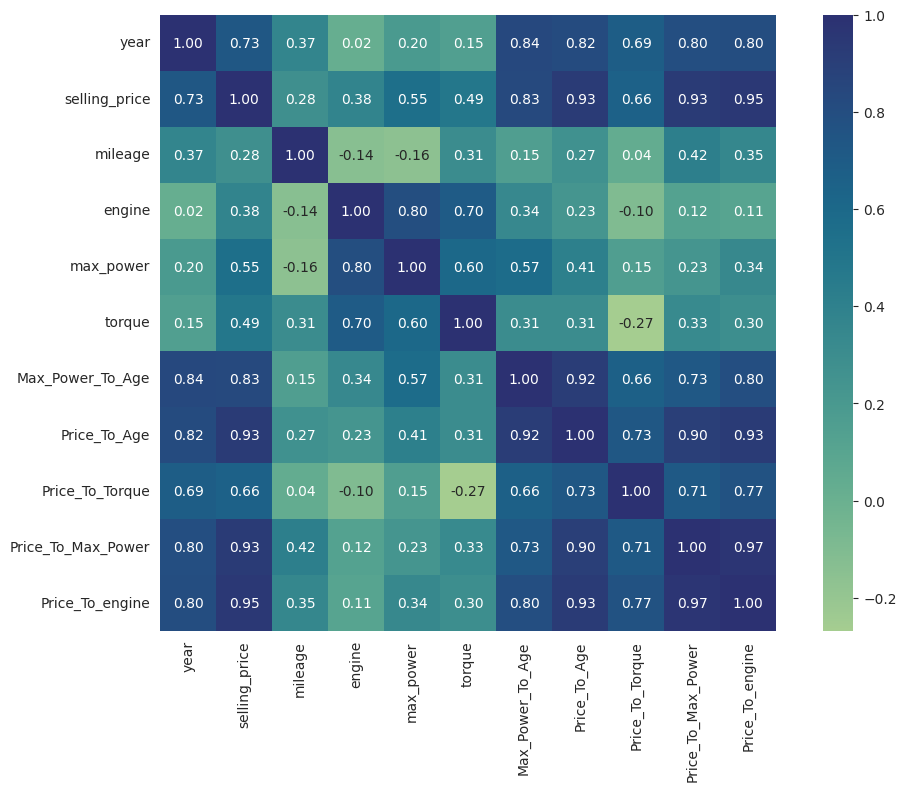

In [114]:
# نمایش هبستگی داده ها با استفاده از نمودار
corr_chart(data=new_df)

Mean Squared Erorr : 4647259576.836302 
R2 Score : % 90.0490


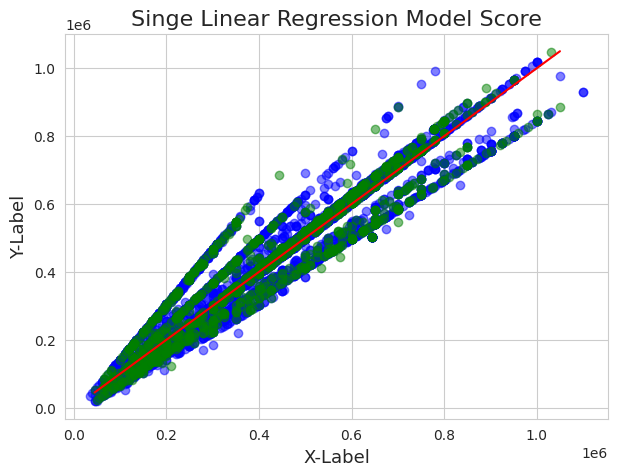

In [154]:
# نمایش نتیجه و نمودار رگرسیون تک خطی مدل
Show_Single_Linear_Regression(new_df,'Price_To_engine','selling_price')

Mean Squared Erorr : 552607088.1593497 
R2 Score : % 98.8167


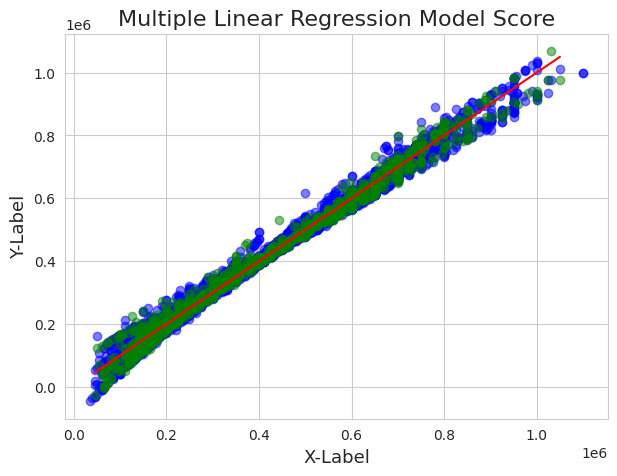

In [155]:
# نمایش نتیجه و نمودار رگرسیون چند متغییره
features = ['Price_To_Max_Power','Price_To_Age','Max_Power_To_Age','Price_To_engine','Price_To_Torque','year','mileage',"engine",'max_power','torque']
Show_Multiple_Linear_Regression(new_df,X=features,Y='selling_price')

Mean Squared Error: 552607088.1593497
R2 Score: % 98.8167


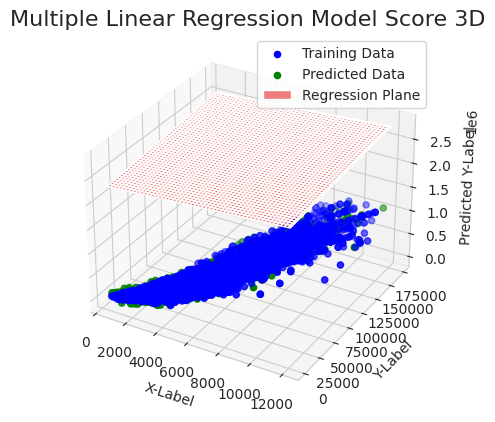

In [189]:
features = ['Price_To_Max_Power','Price_To_Age','Max_Power_To_Age','Price_To_engine','Price_To_Torque','year','mileage',"engine",'max_power','torque']
Show_Multiple_Linear_Regression_3D(new_df,features,'selling_price')

Mean Squared Erorr : 1.1915756864096517e-14 
R2 Score : % 100.0000


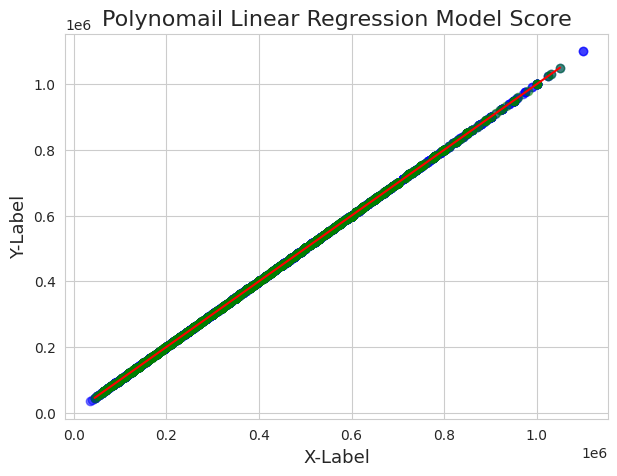

In [180]:
# نمایش نتیجه و نمودار رگرسیون پولینومیال
features = ['Price_To_Max_Power','Price_To_Age','Max_Power_To_Age','Price_To_engine','Price_To_Torque','year','mileage',"engine",'max_power','torque']
Show_Polynomial_Linear_Regression(new_df,features,'selling_price')

Mean Squared Erorr : 552607991.250261 
Best Parameeters : OrderedDict({'alpha': 0.8}) 
Best R2 Score : % 98.8482


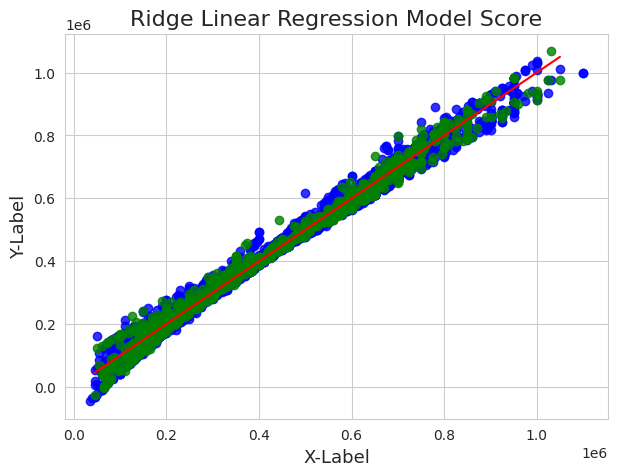

In [157]:
# نمایش نتیجه و نمودار رگرسیون ریدج
features = ['Price_To_Max_Power','Price_To_Age','Max_Power_To_Age','Price_To_engine','Price_To_Torque','year','mileage',"engine",'max_power','torque']
Show_Ridge_Linear_Regression(new_df,features,'selling_price')

Mean Squared Erorr : 552606549.1186612 
Best Parameeters : OrderedDict({'alpha': 0.1}) 
Best R2 Score : % 98.8482


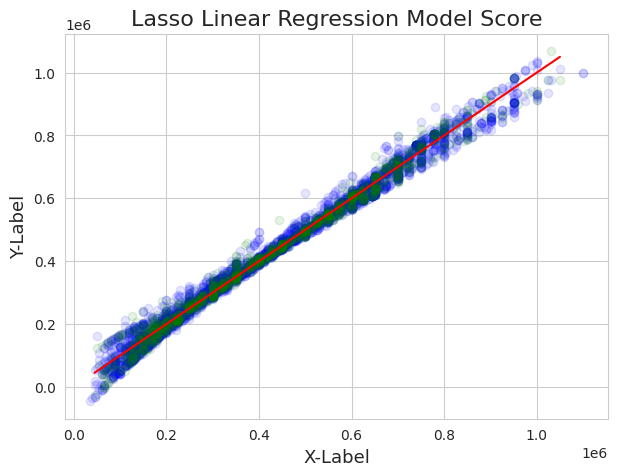

In [171]:
# نمایش نتیجه و نمودار رگرسیون لاسو
features = ['Price_To_Max_Power','Price_To_Age','Max_Power_To_Age','Price_To_engine','Price_To_Torque','year','mileage',"engine",'max_power','torque']
Show_Lasso_Linear_Regression(new_df,features,'selling_price')

Mean Squared Error: 554837477.5823116
Best Parameters: OrderedDict({'alpha': 0.1, 'l1_ratio': 0.3})
Best R2 Score: % 98.8473


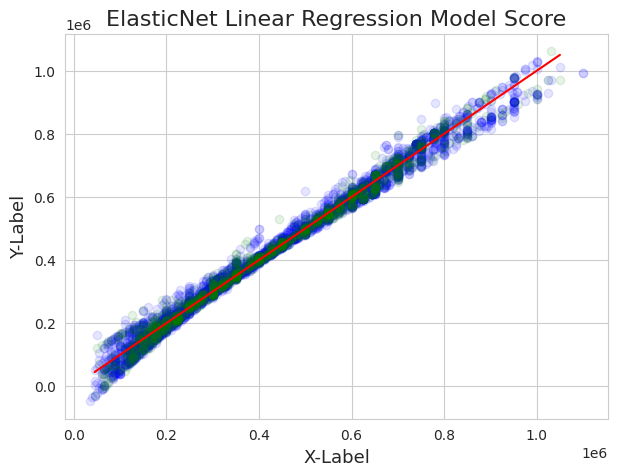

In [191]:
features = ['Price_To_Max_Power','Price_To_Age','Max_Power_To_Age','Price_To_engine','Price_To_Torque','year','mileage',"engine",'max_power','torque']
Show_ElasticNet_Linear_Regression(new_df,features,'selling_price')